In [7]:
import pandas as pd
import jupyterlab
import matplotlib.pyplot as plt
import os

path = os.getcwd()
files = os.listdir(path)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(file, 'peptide')
    df = df.append(data)  # appends all data

df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
#df["F6"] = df["#Feature"].apply(lambda x: x > 6), df.loc[df['F6]]
df['count'] = 1
df['cutsite'] = df['Peptide'].apply(lambda x: x[0:4])
df = df.drop(['-10lgP', 'ppm', 'm/z', 'Area WF1', 'Area WF2', 'Area WF 3', 'Area WF4', 'Area WF5'], axis=1)
df = df.groupby(['Peptide', 'Accession']).sum()
df['count*feat'] = df['count'] * df['#Feature']
df = df.sort_values(['count*feat'], ascending=False)

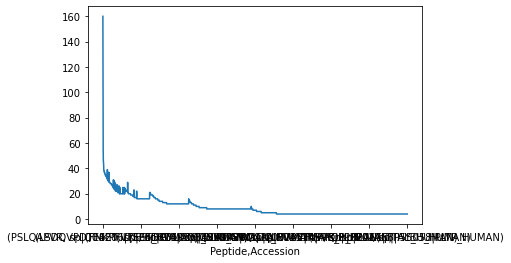

In [10]:
df['#Feature'].plot()